In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1 = pd.read_csv('Train_aBjfeNk.csv')
df2 = pd.read_csv('Test_LqhgPWU.csv')

In [4]:
df1.shape

(8068, 11)

In [5]:
df2.shape

(2627, 10)

In [6]:
df1['ID'].isin(df2['ID']).sum()

2332

In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
''' Observations -
1. Ever_Married -missing values
2. Graduated -missing values
3. Profession -missing values
4. Work_Experience -missing values & may outlers
5. Family_Size -missing values & may outlayers
6. Var_1 -missing values '''

' Observations -\n1. Ever_Married -missing values\n2. Graduated -missing values\n3. Profession -missing values\n4. Work_Experience -missing values & may outlers\n5. Family_Size -missing values & may outlayers\n6. Var_1 -missing values '

In [ ]:
#Ever_married , age<25 == 'NO'

In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
for i in range(8068):
  if df1['Ever_Married'].iloc[i]!='Yes' and df1['Ever_Married'].iloc[i]!='No':
    if df1['Age'].iloc[i]<28:
      df1['Ever_Married'].iloc[i]='No'
    else:
      df1['Ever_Married'].iloc[i]='Yes'  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
for i in range(8068):
  if df1['Graduated'].iloc[i] != 'No' and df1['Graduated'].iloc[i] != 'Yes':
    if df1['Age'].iloc[i]< 26:
      df1['Graduated'].iloc[i] = 'No'
    else:
      df1['Graduated'].iloc[i] = 'Yes'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df1['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [ ]:
df1['Profession'] = df1['Profession'].fillna('Artist')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df1['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [ ]:
for i in range(8068):
  if df1['Work_Experience'].iloc[i] not in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0]:
    if df1['Age'].iloc[i]<26:
      df1['Work_Experience'].iloc[i] = 0.0
    else:
      df1['Work_Experience'].iloc[i] = 1.0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [ ]:
df1['Family_Size'] = df1['Family_Size'].fillna(df1['Family_Size'].mean())

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df1['Var_1'] = df1['Var_1'].fillna('Cat_6')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [ ]:
gender = pd.get_dummies(df1['Gender'],drop_first=True)
married = pd.get_dummies(df1['Ever_Married'],drop_first=True)
graduated = pd.get_dummies(df1['Graduated'],drop_first=True)
profession = pd.get_dummies(df1['Profession'],drop_first=True)
score = pd.get_dummies(df1['Spending_Score'],drop_first=True)
var = pd.get_dummies(df1['Var_1'],drop_first=True)

In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [ ]:
df1 = pd.concat([gender,married,graduated,profession,score,var,df1],axis=1)

In [ ]:
df1.head()

,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [ ]:
df1.drop(['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','ID'],axis=1,inplace=True)

In [ ]:
df1.head()

,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age,Work_Experience,Family_Size,Segmentation
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,22,1.0,4.0,D
1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38,1.0,3.0,A
2,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,67,1.0,1.0,B
3,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,67,0.0,2.0,B
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,40,1.0,6.0,A


In [ ]:
df1.corr()

,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age,Work_Experience,Family_Size
Male,1.000000,0.112568,-0.032833,0.006544,-0.214829,0.136387,0.227074,0.030698,-0.132781,-0.023391,-0.042481,0.041952,-0.062424,-0.014577,-0.011543,-0.011075,-0.033011,0.037674,-0.012937,0.030216,-0.057271,0.054702
Yes,0.112568,1.000000,0.199774,-0.075972,0.017278,0.024276,0.201012,-0.425803,-0.018890,0.203898,-0.095747,0.345569,-0.670376,-0.079832,-0.027609,-0.024634,-0.024832,0.083459,-0.013778,0.566482,-0.087166,-0.077122
Yes,-0.032833,0.199774,1.000000,-0.026661,-0.110927,0.008823,-0.067917,-0.242407,-0.019984,0.004251,-0.087835,0.023300,-0.142017,0.007813,-0.038636,-0.197824,-0.025094,0.177879,-0.014067,0.240304,0.041254,-0.224259
Doctor,0.006544,-0.075972,-0.026661,1.000000,-0.094037,-0.111478,-0.086467,-0.135774,-0.054147,-0.088324,-0.059167,-0.090172,0.058116,0.013981,0.011596,0.015761,-0.014119,-0.030093,0.024622,-0.114043,0.001104,0.006281
Engineer,-0.214829,0.017278,-0.110927,-0.094037,1.000000,-0.112450,-0.087220,-0.136957,-0.054619,-0.089093,-0.059683,-0.055853,-0.004166,-0.026838,0.024446,0.141392,0.007059,-0.103515,0.001160,-0.031729,-0.003218,0.026118
Entertainment,0.136387,0.024276,0.008823,-0.111478,-0.112450,1.000000,-0.103396,-0.162358,-0.064749,-0.105617,-0.070752,-0.104343,0.008045,0.010994,0.036009,0.010028,0.000007,-0.034127,-0.004613,-0.010086,0.014729,-0.014310
Executive,0.227074,0.201012,-0.067917,-0.086467,-0.087220,-0.103396,1.000000,-0.125931,-0.050222,-0.081921,-0.054878,0.406631,-0.228357,-0.024061,-0.045369,0.008507,-0.019961,0.040349,-0.015310,0.129303,-0.025275,0.106804
Healthcare,0.030698,-0.425803,-0.242407,-0.135774,-0.136957,-0.162358,-0.125931,1.000000,-0.078861,-0.128636,-0.086172,-0.145340,0.300201,0.084464,0.011357,0.032446,0.026050,-0.085421,0.022351,-0.442792,-0.013107,0.235255
Homemaker,-0.132781,-0.018890,-0.019984,-0.054147,-0.054619,-0.064749,-0.050222,-0.078861,1.000000,-0.051300,-0.034365,-0.022319,0.016611,0.000430,0.054662,-0.010980,0.024065,-0.024369,-0.023888,-0.058837,0.174435,-0.063294
Lawyer,-0.023391,0.203898,0.004251,-0.088324,-0.089093,-0.105617,-0.081921,-0.128636,-0.051300,1.000000,-0.056056,0.298631,-0.090857,-0.051275,-0.052917,-0.065350,-0.016206,0.123054,-0.043509,0.549588,-0.111354,-0.167116


In [ ]:
df1.describe()

,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.588994,0.623699,0.085275,0.086639,0.117625,0.074244,0.165097,0.030491,0.077219,0.036192,0.150719,0.604611,0.052305,0.101884,0.134978,0.010535,0.658651,0.025161,43.466906,2.459098,2.850123
std,0.497772,0.492047,0.484487,0.279308,0.281322,0.322184,0.262184,0.371291,0.171944,0.266955,0.186780,0.357797,0.488964,0.222656,0.302514,0.341721,0.102107,0.474192,0.156624,16.711696,3.273597,1.499278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,40.000000,1.000000,2.850123
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,53.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,14.000000,9.000000


In [ ]:
df1['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [ ]:
df1['Segmentation']=df1['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [ ]:
df1.head()

,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age,Work_Experience,Family_Size,Segmentation
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,22,1.0,4.0,3
1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38,1.0,3.0,0
2,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,67,1.0,1.0,1
3,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,67,0.0,2.0,1
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,40,1.0,6.0,0


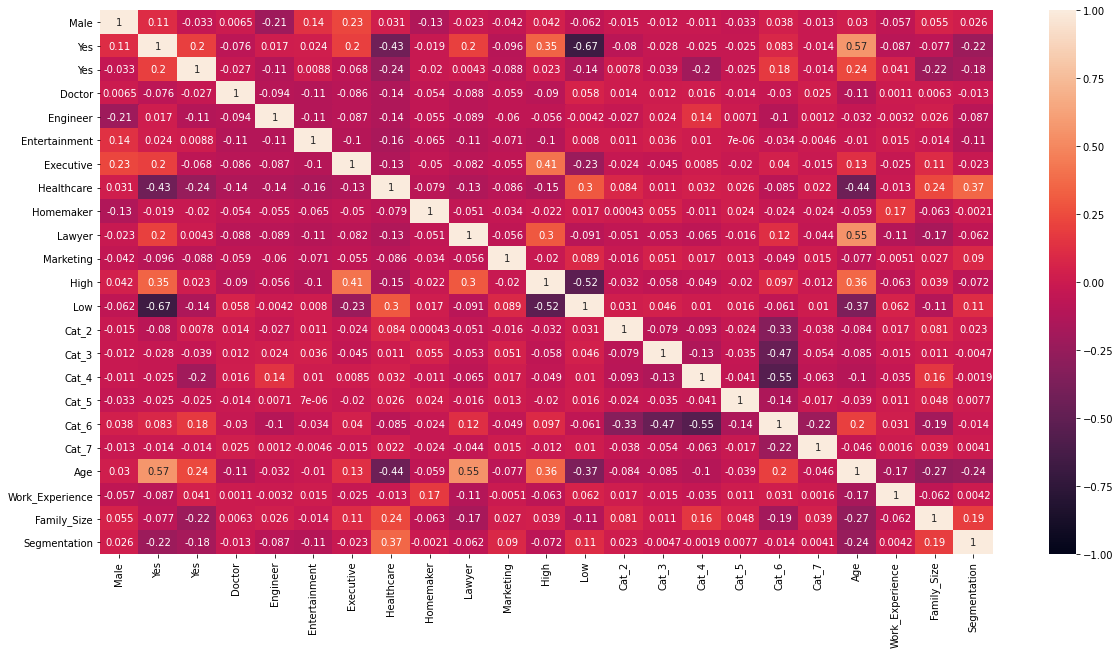

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df1.drop('Segmentation',axis=1))
scaled_array = ss.transform(df1.drop('Segmentation',axis=1))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(scaled_array)

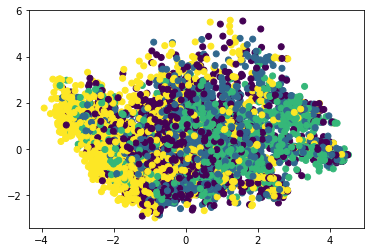

In [ ]:
plt.scatter(X_PCA[:,0],X_PCA[:,1],c =df1['Segmentation'])

In [ ]:
df1.columns

Index(['Male', 'Yes', 'Yes', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'High',
       'Low', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7', 'Age',
       'Work_Experience', 'Family_Size', 'Segmentation'],
      dtype='object')

In [ ]:
X = pd.DataFrame(scaled_array,columns=['Male', 'Yes', 'Yes', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'High',
       'Low', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7', 'Age',
       'Work_Experience', 'Family_Size'])

In [ ]:
y = df1['Segmentation']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train,y_train)

In [ ]:
# y_pred = classifier.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

In [ ]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train,y_train)

In [ ]:
# y_pred = svc.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

In [ ]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,y_train)

In [ ]:
# y_pred  = lr.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

In [ ]:
X.head()

,Male,Yes,Yes,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Age,Work_Experience,Family_Size
0,0.909164,-1.197101,-1.287418,-0.305328,-0.307988,-0.365110,-0.283193,2.248790,-0.177341,-0.289276,-0.193782,-0.421268,0.808676,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,-1.284623,-0.445745,0.767001
1,-1.099912,0.835351,0.776749,-0.305328,3.246876,-0.365110,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782,-0.421268,-1.236590,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657,-0.327151,-0.445745,0.099972
2,-1.099912,0.835351,0.776749,-0.305328,3.246876,-0.365110,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782,-0.421268,0.808676,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1.408268,-0.445745,-1.234085
3,0.909164,0.835351,0.776749,-0.305328,-0.307988,-0.365110,-0.283193,-0.444684,-0.177341,3.456912,-0.193782,2.373788,-1.236590,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,1.408268,-0.751238,-0.567056
4,-1.099912,0.835351,0.776749,-0.305328,-0.307988,2.738901,-0.283193,-0.444684,-0.177341,-0.289276,-0.193782,2.373788,-1.236590,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657,-0.207467,-0.445745,2.101059


In [ ]:
y.head()

0    3
1    0
2    1
3    1
4    0
Name: Segmentation, dtype: int64

In [ ]:
X.shape

(8068, 22)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(10,activation='relu',input_dim=22),
                                 keras.layers.Dense(10,activation='relu'),
                                 keras.layers.Dense(4,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 384
Trainable params: 384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train,y_train,epochs=500,validation_data=(X_valid,y_valid),batch_size=25)

Epoch 1/500
182/182 [==============================] - 0s 3ms/step - loss: 1.7864 - accuracy: 0.2616 - val_loss: 1.6950 - val_accuracy: 0.2723
Epoch 2/500
182/182 [==============================] - 0s 2ms/step - loss: 1.5754 - accuracy: 0.2680 - val_loss: 1.5326 - val_accuracy: 0.2875
Epoch 3/500
182/182 [==============================] - 0s 2ms/step - loss: 1.4738 - accuracy: 0.2779 - val_loss: 1.4479 - val_accuracy: 0.2921
Epoch 4/500
182/182 [==============================] - 0s 2ms/step - loss: 1.4202 - accuracy: 0.2918 - val_loss: 1.3993 - val_accuracy: 0.3073
Epoch 5/500
182/182 [==============================] - 0s 2ms/step - loss: 1.3883 - accuracy: 0.3173 - val_loss: 1.3683 - val_accuracy: 0.3417
Epoch 6/500
182/182 [==============================] - 0s 2ms/step - loss: 1.3669 - accuracy: 0.3528 - val_loss: 1.3467 - val_accuracy: 0.3781
Epoch 7/500
182/182 [==============================] - 0s 2ms/step - loss: 1.3510 - accuracy: 0.3676 - val_loss: 1.3302 - val_accuracy: 0.3946

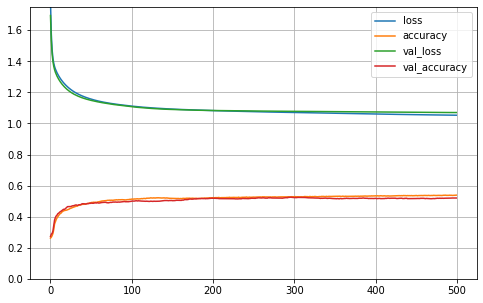

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.75)
plt.show()